# Proyek Analisis Data: Nama dataset
- Nama: Elvina Arum Kusuma
- Email:  elvina15@ymail.com
- Id Dicoding: elvina_felsa

## #Menentukan Pertanyaan Bisnis

DISKRIPSI

Proses persewaan sepeda sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca,
curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat mempengaruhi perilaku sewa. Kumpulan data inti terkait dengan
catatan sejarah dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., AS yang merupakan
tersedia untuk umum di http://capitalbikeshare.com/system-data. Kami mengumpulkan data setiap dua jam dan setiap hari, lalu
mengekstraksi dan menambahkan informasi cuaca dan musiman yang sesuai. Informasi cuaca diambil dari http://www.freemeteo.com.

- pertanyaan 1

Tren Peminjaman Sepeda:

Bagaimana tren peminjaman sepeda dari waktu ke waktu? Apakah ada pola tertentu yang terlihat?
Apakah ada hari-hari tertentu yang cenderung memiliki tingkat peminjaman lebih tinggi daripada yang lain? Jika ya, mengapa demikian?

- pertanyaan 2

Apakah ada tren musiman yang signifikan (misalnya, perbedaan penggunaan antara musim panas dan musim dingin)?
Apakah ada pola penggunaan yang berkaitan dengan jam tertentu (pagi, siang, malam)?


- Pertanyaan ke 3 

Apakah terdapat perbedaan pola peminjaman sepeda antara pengguna casual dan terdaftar pada waktu tertentu dalam sehari (misalnya, pagi, siang, sore, malam)? 

## Keterangan Dataset

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

## Menyiapkan semua library yang dibutuhkan

## Data Wrangling

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

####  Melakukan Pembacaan Pada Day Table

In [7]:
Day_df = pd.read_csv("https://raw.githubusercontent.com/Elvina2242/dataset_Bike_rental/main/day.csv")
Day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Melakukan Pembacaan Pada Hour Table

In [13]:
Hour_df = pd.read_csv("https://raw.githubusercontent.com/Elvina2242/dataset_Bike_rental/main/hour.csv")
Hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [38]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Info dari dataset Day disimpulkan tidak ditemukan data yang hilang dan terduplikat 

In [44]:
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Info dari dataset Hour tidak ditemukan  duplikat dan data yang hilang

## Cleaning Data

#### Menghitung Duplikat

In [47]:
print("Jumlah duplikasi: ", Day_df.duplicated().sum())

Jumlah duplikasi:  0


In [49]:
print("Jumlah duplikasi: ", Hour_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

In [57]:
Day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari dataset Day bisa disimpulkan:
25% orang menyewa sepeda pada musim Summer sisanya penyewaan sepeda terbanyak di musim Fall

Bisa disimpulkan bahwa musim "Fall" orang -orang gemar melakukan kegiatan bersepeda untuk hari teramai persewaan sepeda pada "Weekday" .
Setelah saya telusuri ternyata musim gugur (Fall Season ) adalah musim terbaik bagi para wisatawan menikmati keindahan alam eropa yang menunjukan kecantikan warna daun yang berwana kuning dan rumput yang basah


In [59]:
Hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Untuk dataset diatas didapatkan info untuk rata -rata waktu persewaan sepeda pukul 11.00, sedangkan untuk hari penyewaan sepeda terbanyakan masih di Weekday

## Explore Data Analyst

#### Visualization & Explanatory Analysis

Pertanyaan 3

Apakah terdapat perbedaan pola peminjaman sepeda antara pengguna casual dan terdaftar pada waktu tertentu dalam sehari ? 

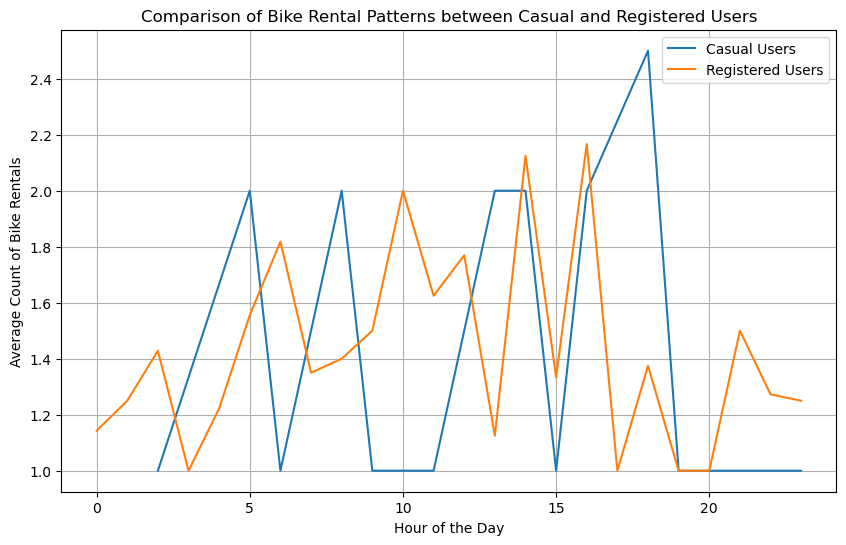

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Anggaplah data telah dimuat ke dalam DataFrame dengan nama 'dataframe'
Hour_df = pd.read_csv("https://raw.githubusercontent.com/Elvina2242/dataset_Bike_rental/main/hour.csv")
# Membuat kolom baru 'hour' dari kolom 'instant' yang merepresentasikan jam pada hari
Hour_df['hr'] = Hour_df['instant'] % 24

# Mengelompokkan data berdasarkan jenis pengguna (casual dan terdaftar) dan jam pada hari
grouped_data = Hour_df.groupby(['hr', 'registered'])['cnt'].mean().reset_index()

# Filter data untuk pengguna casual dan terdaftar
casual_data = grouped_data[grouped_data['registered'] == 0]
registered_data = grouped_data[grouped_data['registered'] == 1]

# Plot perbandingan pola peminjaman sepeda pada waktu tertentu dalam sehari
plt.figure(figsize=(10, 6))
plt.plot(casual_data['hr'], casual_data['cnt'], label='Casual Users')
plt.plot(registered_data['hr'], registered_data['cnt'], label='Registered Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Bike Rentals')
plt.title('Comparison of Bike Rental Patterns between Casual and Registered Users')
plt.legend()
plt.grid(True)
plt.show()


Dari data diatas  bisa dilihat trennya penyewa dengan status keanggotaan "Casual" labih banyak menyewa sepeda sebanyak 20 Jam dalam sehari 



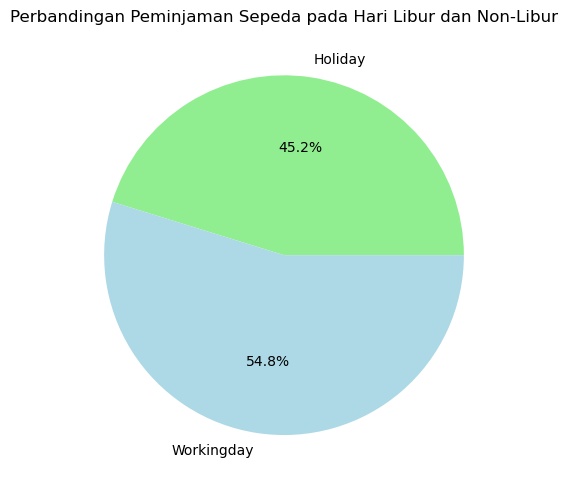

In [15]:
# Menambahkan kolom baru untuk menandai hari libur dan non-libur
Day_df['jenis_hari'] = Day_df['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Workingday')
 
# Menghitung rata-rata peminjaman sepeda pada hari libur dan non-libur
rata_rata_peminjaman_hari = Day_df.groupby('jenis_hari')['cnt'].mean()

# Plot pie chart untuk membandingkan peminjaman pada hari libur dan non-libur
plt.figure(figsize=(5, 5))
plt.pie(rata_rata_peminjaman_hari, labels=rata_rata_peminjaman_hari.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
plt.title('Perbandingan Peminjaman Sepeda pada Hari Libur dan Non-Libur')
plt.tight_layout()
plt.show()

Pada diagram pie diatas permintaan  persewaan pada WorkingDay lebih banyak sebesar 54.8% dibandingkan  Holiday.

### Pertanyaan 2: 

Apakah ada tren musiman yang signifikan (misalnya, perbedaan penggunaan antara musim panas dan musim dingin)?
Apakah ada pola penggunaan yang berkaitan dengan jam tertentu (pagi, siang, malam)?

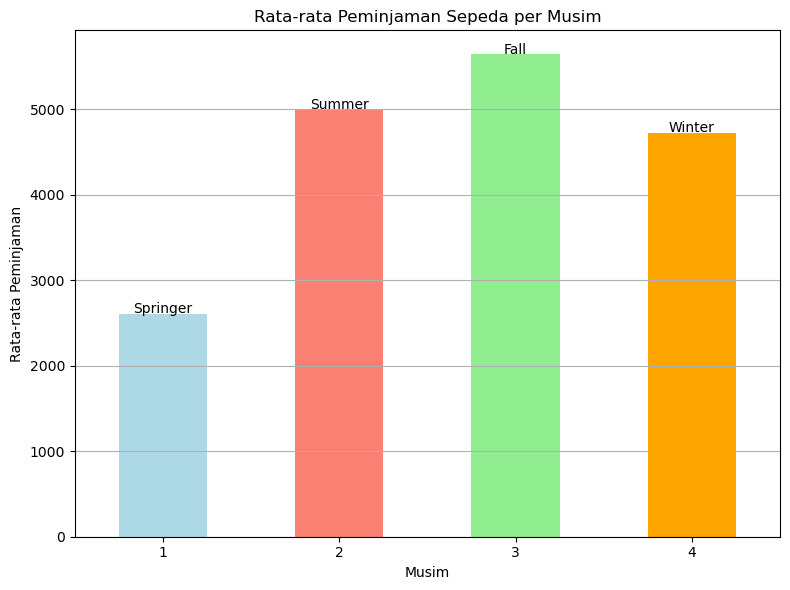

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari tabel atau file
# Misalnya, jika data tersedia dalam DataFrame df
# df = pd.read_csv('nama_file.csv')

# Mengelompokkan data berdasarkan musim dan menghitung rata-rata peminjaman sepeda
rata_rata_per_musim = Day_df.groupby('season')['cnt'].mean()

# List yang berisi keterangan musim berdasarkan angka musim
keterangan_musim = ['Springer', 'Summer', 'Fall', 'Winter']

# Plot grafik untuk membandingkan jumlah rata-rata peminjaman tiap musim
plt.figure(figsize=(8, 6))
grafik = rata_rata_per_musim.plot(kind='bar', color=['lightblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(rotation=0)

# Menambahkan keterangan musim ke dalam grafik
for i, v in enumerate(rata_rata_per_musim):
    plt.text(i, v + 10, keterangan_musim[i], ha='center')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Dari diagram batang diatas di fall season (musim gugur) menduduki tingkat teratas untuk jumlah persewaan sepeda terbanyak 

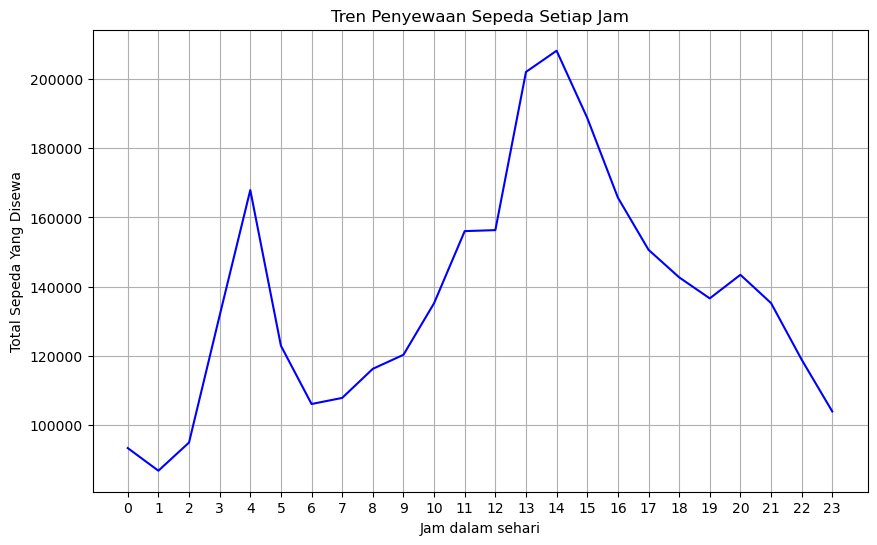

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv('https://raw.githubusercontent.com/Elvina2242/dataset_Bike_rental/main/hour.csv')  # Ganti 'nama_file.csv' dengan nama file sesuai dengan lokasi dan nama file sebenarnya

# Memastikan kolom 'dteday' merupakan tipe data datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Membuat kolom baru 'hour' dari kolom 'instant' yang merepresentasikan jam pada hari
df['hr'] = df['instant'] % 24

# Mengelompokkan data berdasarkan jam dalam sehari dan menghitung jumlah total penyewaan per jam
hourly_rentals = df.groupby('hr')['cnt'].sum()

# Plot tren penyewaan sepeda per jam
plt.figure(figsize=(10, 6))
hourly_rentals.plot(kind='line', color='blue')
plt.xlabel('Jam dalam sehari')
plt.ylabel('Total Sepeda Yang Disewa')
plt.title('Tren Penyewaan Sepeda Setiap Jam')
plt.xticks(range(24))  # Set sumbu x menjadi jam dalam sehari (0-23)
plt.grid(True)
plt.show()




Dari diagram terdapat pola  penyewaan sepeda terbanyak  20.000 sepeda disewa dipukul 14.00

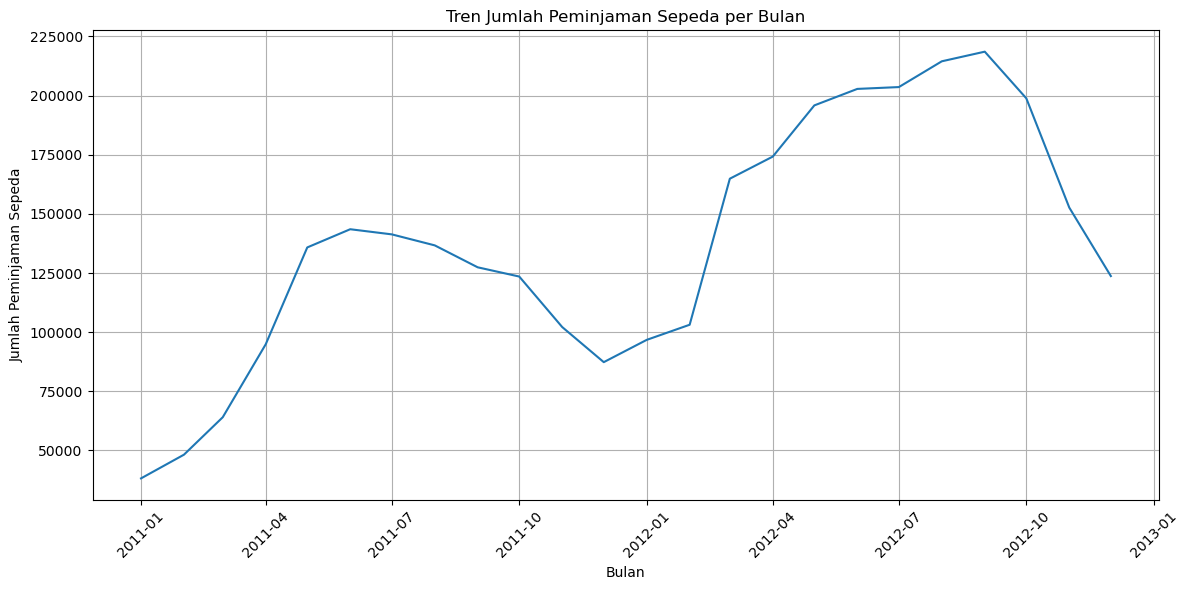

In [28]:
# Menampilkan tren jumlah peminjaman sepeda per bulan
monthly_counts = df.groupby(df['dteday'].dt.to_period('M'))['cnt'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values)
plt.title('Tren Jumlah Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Dari diagram garis diatas terdapat peminjaman sepeda terbanyak diatara bulan juli hingga oktober sebanyak 22.5000

## Conclusion

Dari data diatas bisa disimpulkan bahwa :

- Conclusion pertanyaan 1
pertanyaan 1
Tren Peminjaman Sepeda:

Bagaimana tren peminjaman sepeda dari waktu ke waktu? Apakah ada pola tertentu yang terlihat? Apakah ada hari-hari tertentu yang cenderung memiliki tingkat peminjaman lebih tinggi daripada yang lain? Jika ya, mengapa demikian

Jawaban :
untuk pertanyaan 1 terdapat pola tren peminjaman dari waktu ke waktu dari hasil analisa diatas kecenderungan orang -orang menyewa sepeda pada"Weekday" di jam 14.00 .Dan kebanyakan penyewa melakukan penyewaan di bulan Juli sampai Oktober .


- conclution pertanyaan 2
Apakah ada tren musiman yang signifikan (misalnya, perbedaan penggunaan antara musim panas dan musim dingin)?
Apakah ada pola penggunaan yang berkaitan dengan jam tertentu (pagi, siang, malam)?

Jawaban:
Untuk pertanyaan ini tren musim yang paling banyak diminati untuk menyewa sepeda adalah musim"Fall/musim gugur" ,pola yang berkaitan adalah jam waktu menyewa pada jam 14 disaat itu langit masih cerah dan sejuk untuk musim gugu. 


Pertanyaan ke 3

Apakah terdapat perbedaan pola peminjaman sepeda antara pengguna casual dan terdaftar pada waktu tertentu dalam sehari (misalnya, pagi, siang, sore, malam)? 

Jawaban : Dalam hal ini ada tren pola penyewa dengan member "casual" lebih banyak melakukan penyewaan di siang hari

kesimpulan bisnis:
    dari 3 pertanyaan diatas bisa disimpulkan bahwa musim gugur (Fall Season) memiliki jumlah peminat penyewaan sepeda terbanyak dikarenakan pada musim ini . Alam eropa sangatlah indah dan banyak turis berdatangan untuk berlibur .Sejalan dengan data yang telah saya analisa . Untuk meningkatkan bisnis ini pengelola bisa membuat paket tour "Fall Season" yang berlangsung di Bulan Agustus sd Oktober.